<a href="https://colab.research.google.com/github/lamide-xxx/Deepfake-Detection/blob/main/LateFusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Concatenating Models

In [109]:
#Mount Google Drive on Notebook
from google.colab import drive
drive.mount('/content/drive')#, force_remount = True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import necessary Libraries

In [2]:
import os
import math
import tensorflow
import keras
from keras.models import Sequential, load_model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense, InputLayer, Dropout, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from matplotlib.image import imread
from PIL import Image
import cv2
from keras.callbacks import CSVLogger,ModelCheckpoint,LearningRateScheduler, EarlyStopping # defining a function to save progress of the model
from tensorflow.keras.optimizers import SGD, Adam
import pickle

In [3]:
gdrive_audio= '/content/drive/MyDrive/Colab Notebooks/data/deepfake-audio'
gdrive_video = '/content/drive/MyDrive/Colab Notebooks/data/deepfake-videos'

In [19]:
audio_csv = sorted(pd.read_csv(gdrive_audio+"/test_audio_images.csv")['audio'])
video_csv = sorted(pd.read_csv(gdrive_video+"/test_3_images.csv")['image'])

In [38]:
audio_csv[0],video_csv[0]

('0_FakeVideo-RealAudioAfricanmenid0153000002_id00701_lW6uzLIOwd0.mp4.wav.png',
 '0_RealVideo-FakeAudioAfricanmenid0229600019_fake.mp4_frame0.jpg')

In [28]:
aud = {x.split('.mp4')[0] for x in audio_csv}

vid = {x.split('.mp4')[0] for x in video_csv}

In [67]:
data = list(aud.intersection(vid))
data

['1_FakeVideo-FakeAudioAfricanmenid0204000476_id00476_wavtolip',
 '1_FakeVideo-FakeAudioCaucasian (European)womenid0394100021_id00287_2NpfYjyMsPM_id00434_wavtolip',
 '1_FakeVideo-FakeAudioAfricanwomenid0424500072_id04055_wavtolip',
 '1_FakeVideo-FakeAudioCaucasian (European)womenid0385800092_id00379_wavtolip',
 '1_FakeVideo-FakeAudioCaucasian (American)womenid0124800005_id01004_867Wlj7Gw68_id01217_wavtolip',
 '1_FakeVideo-FakeAudioCaucasian (American)womenid0124800005_id00025_wavtolip',
 '1_FakeVideo-FakeAudioAfricanmenid0204000476_id00761_wavtolip',
 '1_FakeVideo-FakeAudioAfricanwomenid0443700002_id00359_wavtolip',
 '0_RealVideo-RealAudioAsian (South)womenid0768900028',
 '1_FakeVideo-FakeAudioCaucasian (American)womenid0246400002_id01216_wavtolip',
 '1_FakeVideo-FakeAudioCaucasian (American)womenid0246400002_id01217_wavtolip',
 '1_FakeVideo-FakeAudioCaucasian (American)menid0407300021_2_id01175_wavtolip',
 '1_FakeVideo-FakeAudioCaucasian (American)womenid0124800005_id03707_pwNcRPQ5qdo

In [ ]:
labels = [1 if 'Fake' in x else 0 for x in data]
labels

Import models

In [106]:
audio_model = load_model(gdrive_audio+"/models/Good Models/Inception_weight-10-0.03.hdf5")
video_model = load_model(gdrive_video+"/models/good models/Inception_weight-13-0.73.hdf5")

In [93]:
datagen = image.ImageDataGenerator(rescale=1. /255)
audio_path = gdrive_audio+'/test_2/'
video_path = gdrive_video+'/test_3/'
def preprocess(path):
  # image = tensorflow.keras.preprocessing.image.load_img(path, target_size=(224, 224))
  # input_arr = tensorflow.keras.preprocessing.image.img_to_array(image)
  # input_arr = np.array([input_arr]) 
  # input_arr = input_arr.astype('float32') * 1. / 255
  new_img = tensorflow.keras.utils.load_img(path, target_size=(224, 224))
  img = tensorflow.keras.utils.img_to_array(new_img)
  img = np.expand_dims(img, axis=0)
  img = img/255



  # test_datagen = datagen.flow_from_directory(path, target_size =(224, 224), batch_size = 1)
  return img


def pred(path):
  video_class = 'RealVideo/' if 'RealVideo' in path else 'FakeVideo/'
  audio_class = '0RealAudio/' if 'RealAudio' in path else '1FakeAudio/'

  audio_input = preprocess(audio_path+ audio_class+ path+'.mp4.wav.png')
  video_input = preprocess(video_path+ video_class+ path+ '.mp4_frame0.jpg')
  pred1 = audio_model.predict(audio_input)
  pred2 = video_model.predict(video_input)
  # print (f'for {path} audio prediction is {pred1} and video is {pred2}')
  return (pred1+pred2)/2

In [107]:
from keras.preprocessing import image
y_pred = [pred(x) for x in data]
y_pred

1/1 [==============================] - 0s 122ms/step


[array([[0.36772618]], dtype=float32),
 array([[0.25144705]], dtype=float32),
 array([[0.2122803]], dtype=float32),
 array([[0.4701605]], dtype=float32),
 array([[0.42361984]], dtype=float32),
 array([[0.11047222]], dtype=float32),
 array([[0.37947017]], dtype=float32),
 array([[0.37441975]], dtype=float32),
 array([[0.5029307]], dtype=float32),
 array([[0.47749436]], dtype=float32),
 array([[0.4690053]], dtype=float32),
 array([[0.4129425]], dtype=float32),
 array([[0.43697354]], dtype=float32),
 array([[0.44540974]], dtype=float32),
 array([[0.22676721]], dtype=float32),
 array([[0.2750683]], dtype=float32),
 array([[0.28633845]], dtype=float32),
 array([[0.49516568]], dtype=float32),
 array([[0.49320656]], dtype=float32),
 array([[0.44256714]], dtype=float32),
 array([[0.28858498]], dtype=float32),
 array([[0.30910137]], dtype=float32),
 array([[0.42097977]], dtype=float32),
 array([[0.07212117]], dtype=float32),
 array([[0.139401]], dtype=float32),
 array([[0.00700873]], dtype=floa

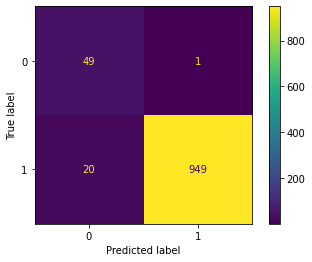

In [108]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

y_pred_bin = np.where(np.array(y_pred) > 0.5, 0, 1)
conf = confusion_matrix(labels, y_pred_bin.flatten())
disp = ConfusionMatrixDisplay(confusion_matrix= conf)


disp = disp.plot()

plt.show()

In [75]:
y_pred_bin

array([[[0]],

       [[0]],

       [[0]],

       ...,

       [[1]],

       [[0]],

       [[0]]])

In [74]:
predicted_vals

(1019,)